# Task-3 Graduate Rotational Internship Program (GRIP - Feb 2021) organised by The Sparks Foundation.
### Author: Adya Bajpai   (Intern Feb 2021)

# Exploratory Data Analysis - Retail

#### Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics. 
#### It also helps to determine if the statistical techniques that are being considering for data analysis are appropriate.

### Que. Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.
### Aim: To find weak areas that could be processed to make profit.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
str = pd.read_csv('SampleSuperstore.csv')

In [3]:
str.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
str.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Variable Category:
**Categorical:**

1. Ship Mode
2. Segment
3. Country
4. City
5. State
6. Region
7. Postal Code
8. Category
9. Sub-Category

**Continuous:**
 
1. Profit
2. Sales

**Discreet:**

1. Quantity
2. Discount

In [5]:
str.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

##### From here we can see that there is no null value, so we do not have to bother about missing value treatment

In [6]:
str.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

1. We can see that there is just 1 country so we can drop the Country Coloumn 
2. Postal codes are very specific and large to be categorized, also the state,city and regions are given so it won't make much of a difference so we can drop it as well.

In [7]:
del str['Country']
del str['Postal Code']

In [8]:
str.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
str.duplicated().sum()

50

In [10]:
str.drop_duplicates()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Univariate Analysis 

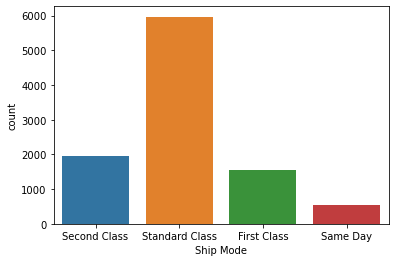

In [11]:
sns.countplot('Ship Mode', data=str)

#### Maximum people opt for Standard Shipping Mode

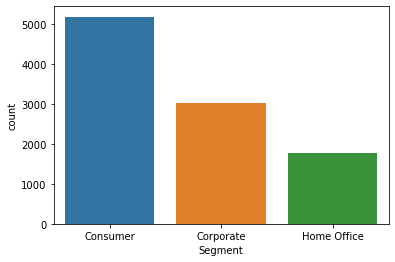

In [12]:
sns.countplot('Segment', data=str)

#### Maximum Sales is in Consumer Industry

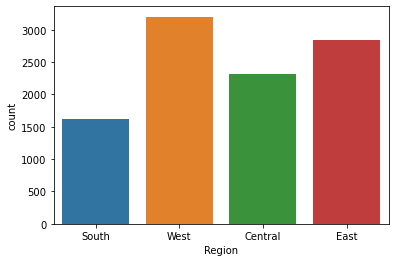

In [13]:
sns.countplot('Region', data=str)

#### Maximum Sales is in West Region

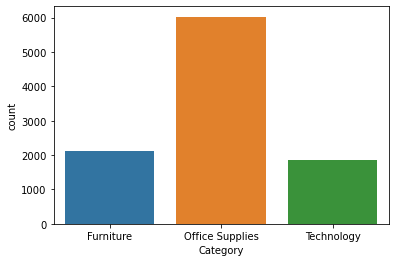

In [14]:
sns.countplot('Category', data=str)

#### Maximum Sales is in The Category of Office

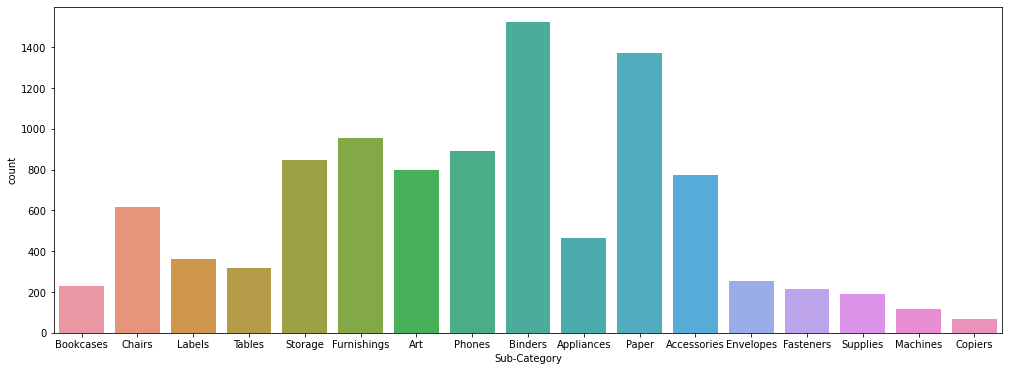

In [15]:
plt.figure(figsize=(17,6))
sns.countplot('Sub-Category', data=str)

#### Binders followed by Paper are the Most sold products in the sub category

In [16]:
str['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

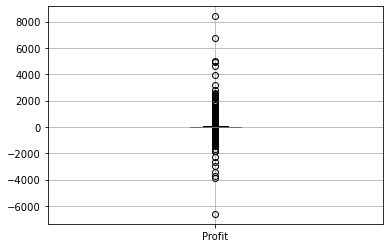

In [17]:
str.boxplot(column = ['Profit'])

In [18]:
print(str['Profit'].skew())

7.561431562468343


The skewness value of 7.5 shows that the variable 'Profit' has a right-skewed distribution, indicating the presence of extreme higher values.
- We will cap our outliers to 10th and 90th percentile

In [19]:
print(str['Profit'].quantile(0.10))
print(str['Profit'].quantile(0.90))

-15.47346
89.28162000000006


In [20]:
str['Profit'] = np.where(str['Profit']<-15.47346,-15.47346,str['Profit'])
str['Profit'] = np.where(str['Profit']>89.28162,89.28162,str['Profit'])
print(str['Profit'].skew())

1.1785401791509946


In [21]:
str['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

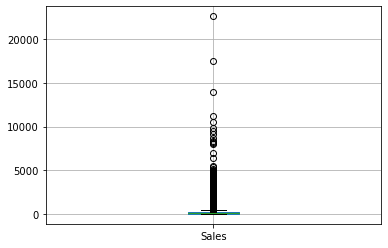

In [22]:
str.boxplot(column = ['Sales'])

In [23]:
print(str['Sales'].skew())

12.97275234181623


In [24]:
print(str['Sales'].quantile(0.10))
print(str['Sales'].quantile(0.90))

7.8972
572.7060000000001


In [25]:
str['Sales'] = np.where(str['Sales']<7.8972,7.8972,str['Sales'])
str['Sales'] = np.where(str['Sales']>572.7060,572.7060,str['Sales'])
print(str['Sales'].skew())

1.3590859460548397


In [26]:
str['Sales'].describe()

count    9994.000000
mean      148.594065
std       186.172849
min         7.897200
25%        17.280000
50%        54.490000
75%       209.940000
max       572.706000
Name: Sales, dtype: float64

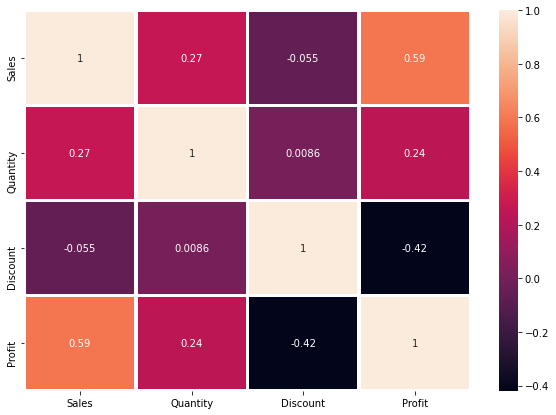

In [27]:
plt.figure(figsize = (10,7))
sns.heatmap(str.corr(), annot=True, xticklabels='auto', yticklabels='auto', linewidth=2.5) 

1. There is a positive Correlation between Sales and Profit. (Sales Increase Profit Increases)
2. There is a positive Correlation between Quantity and Profit. (Quantity Increase Profit Increases)
3. There is a Negative Correlation between Profit and Discount. (Discount Increase Profit Decreases)
4. There is a Negative Correlation between Sales and Discount. (Sales Increase Discount Decreases)
5. Nearly no correlation between Quantity and Discount. (0 Correlation)

### Profit Associated with Segment

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E8CABEE160>],
      dtype=object)

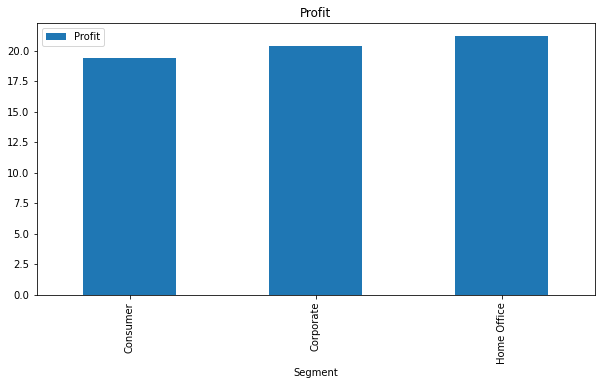

In [28]:
a = pd.pivot_table(str, index='Segment', values='Profit')
a.plot(kind = 'bar', subplots=True, figsize=(10,5))

#### Home Offices give the most profit

### Profit Associated with Sub-Categories

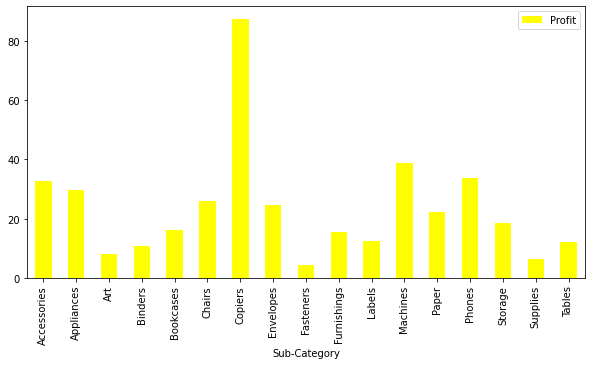

In [29]:
b = pd.pivot_table(str, index='Sub-Category', values='Profit')
b.plot(kind = 'bar', color='Yellow', figsize=(10,5), fontsize=10)

#### Copiers give the most profit

### Sales in association with States

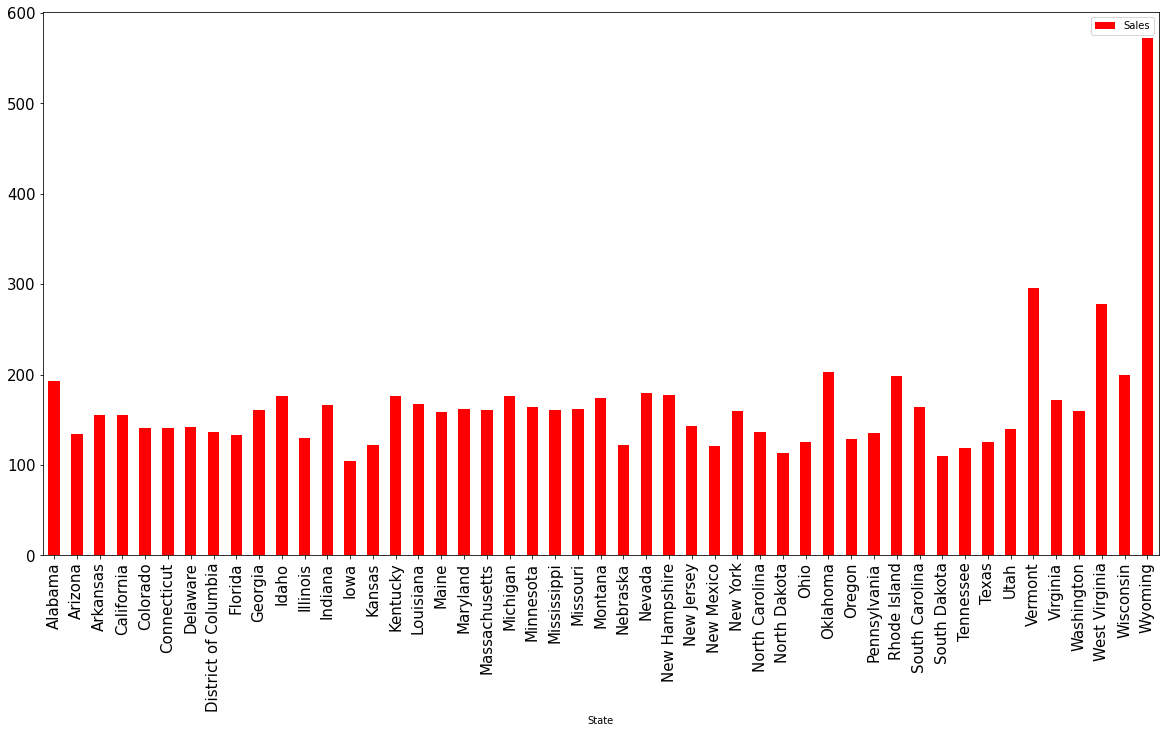

In [30]:
c = pd.pivot_table(str, index='State', values='Sales')
c.plot(kind = 'bar', color='red', figsize=(20,10), fontsize=15)

#### Maximum Sales is in Wyoming State

### Segment and Region Columns

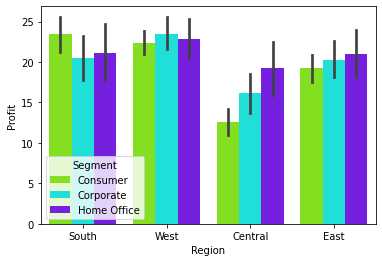

In [31]:
sns.barplot(data = str, x='Region', y='Profit', hue= 'Segment', palette='hsv' )
plt.show()

#### Central Region has Less number of concumers

### Profit associated with different categories

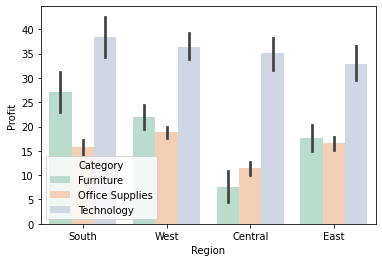

In [32]:
sns.barplot(data = str, x='Region', y='Profit', hue= 'Category', palette='Pastel2')
plt.show()

1. sale of furniture is significantly low in Central and Eastern Regions.
2. There is very low office supply in Central Region.

### Lineplots

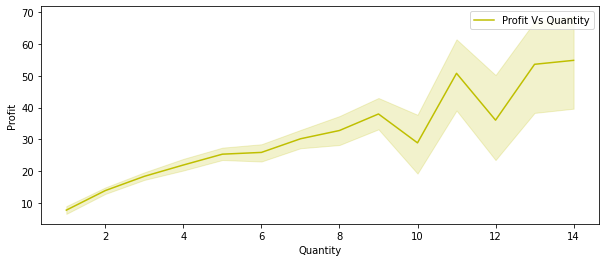

In [33]:
plt.figure(figsize = (10,4))
sns.lineplot('Quantity', 'Profit', data = str, color = 'y', label= 'Profit Vs Quantity')
plt.legend()

#### constant increment in Profit with increase in Quantity

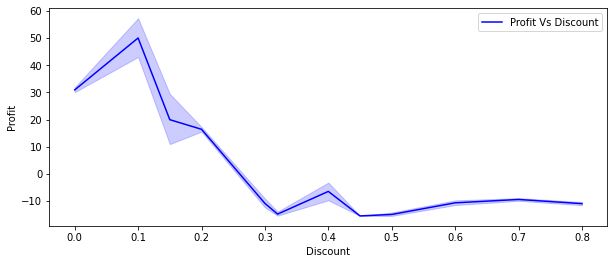

In [34]:
plt.figure(figsize = (10,4))
sns.lineplot('Discount', 'Profit', data = str, color = 'b', label= 'Profit Vs Discount')
plt.legend()

### Conclusion
1. The superstore incures losses by giving discounts.
2. But if they stop giving Discounts their Sales will be impacted and they won't be able to attract more long term customers.
3. Discounts are offered during festivals, end-of-season and clearance sales which are necessary so that the store can make space in their warehouses for fresh stock. 
4. By incurring small losses, the company gains in the future by attracting more long term customers. 
5. The small losses from discounts are an essential part of company's business

## Dashboard

In [35]:
import pywedge as pw

In [36]:
mc = pw.Pywedge_Charts(str, c=None, y='Profit')
charts = mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')